In [63]:
import requests
import json
import pandas as pd
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
null_value_mapping = {
    '(null)' : None,
    'Nan' : None,
    'NONE' : None,
    'nan' : None,
    'U' : None,
    'UNKNOWN' : None
}

In [65]:
data_endpoints_dict = {
    'Shooting Data' : 'https://data.cityofnewyork.us/resource/833y-fsy8.json',
}

In [66]:
class Loader:
    def load_file(self, api_endpoint):
        data = requests.get(api_endpoint)
        data = json.loads(data.text)
        data_df = pd.json_normalize(data)
        data = None
        return data_df

In [67]:
data_loader = Loader()

In [68]:
shooting_data = data_loader.load_file(data_endpoints_dict['Shooting Data'])
shooting_data

,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,geocoded_column.type,geocoded_column.coordinates,perp_age_group,perp_sex,perp_race,location_desc
0,228798151,2021-05-27T00:00:00.000,21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,Point,"[-73.73083868899994, 40.662964620000025]",NaN,NaN,NaN,NaN
1,137471050,2014-06-27T00:00:00.000,17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,Point,"[-73.92494232599995, 40.81035186300006]",NaN,NaN,NaN,NaN
2,147998800,2015-11-21T00:00:00.000,03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,Point,"[-73.91549174199997, 40.74260663300004]",NaN,NaN,NaN,NaN
3,146837977,2015-10-09T00:00:00.000,18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,Point,"[-73.91945661499994, 40.83778200300003]",NaN,NaN,NaN,NaN
4,58921844,2009-02-19T00:00:00.000,22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,Point,"[-73.85290950899997, 40.88623791800006]",25-44,M,BLACK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23807437,2006-08-10T00:00:00.000,02:54:00,BROOKLYN,83,0,False,25-44,M,WHITE HISPANIC,...,30,53,13828,42,Point,"[-73.92388861199998, 40.70196662700005]",UNKNOWN,U,UNKNOWN,NaN
996,23354095,2006-07-04T00:00:00.000,19:58:00,QUEENS,103,0,False,18-24,M,BLACK,...,46,61,24670,41,Point,"[-73.80211334999996, 40.69455352400008]",UNKNOWN,M,BLACK,NaN
997,62085248,2009-05-24T00:00:00.000,23:07:00,BROOKLYN,61,0,False,18-24,M,BLACK,...,8,36,13512,32,Point,"[-73.93962025199994, 40.596135625000045]",UNKNOWN,U,UNKNOWN,MULTI DWELL - PUBLIC HOUS
998,35480310,2007-11-04T00:00:00.000,21:02:00,BROOKLYN,83,0,False,18-24,M,BLACK HISPANIC,...,37,53,13828,42,Point,"[-73.91407247299998, 40.700029974000074]",25-44,M,WHITE HISPANIC,MULTI DWELL - APT BUILD


In [69]:
shooting_data = pd.read_csv("./shooting_incident.csv")
shooting_data

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,05/14/2022,03:02:00,BRONX,OUTSIDE,48,0.0,STREET,(null),False,...,(null),(null),18-24,M,BLACK,1.011526e+06,247828.000000,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,...,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.974580e+05,240485.000000,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,...,M,BLACK,25-44,M,BLACK,1.000999e+06,234464.000000,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK,25-44,M,WHITE HISPANIC,1.012980e+06,251028.000000,40.855644,-73.896141,POINT (-73.896141 40.855644)


In [70]:
shooting_data.dtypes

INCIDENT_KEY                 int64
OCCUR_DATE                  object
OCCUR_TIME                  object
BORO                        object
LOC_OF_OCCUR_DESC           object
PRECINCT                     int64
JURISDICTION_CODE          float64
LOC_CLASSFCTN_DESC          object
LOCATION_DESC               object
STATISTICAL_MURDER_FLAG       bool
PERP_AGE_GROUP              object
PERP_SEX                    object
PERP_RACE                   object
VIC_AGE_GROUP               object
VIC_SEX                     object
VIC_RACE                    object
X_COORD_CD                 float64
Y_COORD_CD                 float64
Latitude                   float64
Longitude                  float64
Lon_Lat                     object
dtype: object

In [71]:
shooting_data['OCCUR_DATE'] = pd.to_datetime(shooting_data['OCCUR_DATE'])
shooting_data['OCCUR_DATE'] = shooting_data['OCCUR_DATE'].dt.date

shooting_data['OCCUR_TIME'] = pd.to_datetime(shooting_data['OCCUR_TIME'], format='%H:%M:%S')
shooting_data['OCCUR_TIME'] = shooting_data['OCCUR_TIME'].dt.time





In [72]:
shooting_data['OCCUR_TIME']


0        21:30:00
1        17:40:00
2        03:56:00
3        18:30:00
4        22:58:00
           ...   
27307    03:02:00
27308    13:15:00
27309    03:29:00
27310    20:08:00
27311    18:14:00
Name: OCCUR_TIME, Length: 27312, dtype: object

In [73]:
shooting_data.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401608,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377757,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335938,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570312,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468750,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [74]:
import pandas as pd

# Generate a range of dates from 2006-01-01 to 2022-12-31
all_dates = pd.date_range(start='2006-01-01', end='2022-12-31')

# Extract unique dates from your dataset
existing_dates = shooting_data['OCCUR_DATE'].dt.date.unique()

# Find missing dates
missing_dates = set(all_dates.date) - set(existing_dates)
sorted_missing_dates = sorted(missing_dates)

for date in sorted_missing_dates:
    print(date)


AttributeError: Can only use .dt accessor with datetimelike values

We have data continuously from 2006 to 2022

In [75]:
print(sorted(shooting_data['OCCUR_TIME']))

[datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 0), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.time(0, 1), datetime.tim

In [76]:
shooting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [77]:
shooting_data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [78]:
shooting_data = shooting_data.drop(['LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC'], axis=1)
shooting_data.head(5)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,2021-05-27,21:30:00,QUEENS,105,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,2014-06-27,17:40:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,2015-11-21,03:56:00,QUEENS,108,0.0,NaN,True,NaN,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,2015-10-09,18:30:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,2009-02-19,22:58:00,BRONX,47,0.0,NaN,True,25-44,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [79]:
columns_to_check = ['BORO', 'PRECINCT', 'JURISDICTION_CODE','LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 
                    'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']

for column in columns_to_check:
    unique_values = shooting_data[column].unique()
    print(f"Distinct values for {column}:\n{unique_values}\n")


Distinct values for BORO:
['QUEENS' 'BRONX' 'BROOKLYN' 'MANHATTAN' 'STATEN ISLAND']

Distinct values for PRECINCT:
[105  40 108  44  47  81 114 101  23  75  71  50  78  30  73  84  90  60
  48 106  28  79 120  34 103  13  83  49  67  52  63 110  41  42  43  26
  77  25  76  14 113  24  69  46  32  45   9  62   7  33 104  61  72  88
  70  10 102  17 115 100   6 107   5 121  94 122  18 109  66  19   1 123
  20  22 112  68 111]

Distinct values for JURISDICTION_CODE:
[ 0.  2.  1. nan]

Distinct values for LOCATION_DESC:
[nan 'MULTI DWELL - APT BUILD' 'MULTI DWELL - PUBLIC HOUS'
 'GROCERY/BODEGA' 'JEWELRY STORE' 'CLOTHING BOUTIQUE' 'GAS STATION'
 'BAR/NIGHT CLUB' 'PVT HOUSE' 'NONE' 'COMMERCIAL BLDG' 'SMALL MERCHANT'
 'BEAUTY/NAIL SALON' 'FAST FOOD' 'DRUG STORE' 'TELECOMM. STORE'
 'DRY CLEANER/LAUNDRY' 'RESTAURANT/DINER' 'HOTEL/MOTEL'
 'SOCIAL CLUB/POLICY LOCATI' 'SUPERMARKET' 'CHAIN STORE' 'HOSPITAL'
 'LIQUOR STORE' 'STORE UNCLASSIFIED' '(null)' 'FACTORY/WAREHOUSE'
 'DEPT STORE' 'SHOE STOR

In [80]:
shooting_data.replace({'OCCUR_DATE': null_value_mapping,
                       'OCCUR_TIME': null_value_mapping,
                       'BORO': null_value_mapping,
                       'LOC_OF_OCCUR_DESC': null_value_mapping,
                       'PRECINCT': null_value_mapping,
                       'JURISDICTION_CODE': null_value_mapping,
                       'LOC_CLASSFCTN_DESC': null_value_mapping,
                       'LOCATION_DESC': null_value_mapping,
                       'STATISTICAL_MURDER_FLAG': null_value_mapping,
                       'PERP_AGE_GROUP': null_value_mapping,
                       'PERP_SEX': null_value_mapping,
                       'PERP_RACE': null_value_mapping,
                       'VIC_AGE_GROUP': null_value_mapping,
                       'VIC_SEX': null_value_mapping,
                       'VIC_RACE': null_value_mapping}, inplace=True)

shooting_data.replace({np.nan: None}, inplace=True)

In [81]:
for column in columns_to_check:
    unique_values = shooting_data[column].unique()
    print(f"Distinct values for {column}:\n{unique_values}\n")

Distinct values for BORO:
['QUEENS' 'BRONX' 'BROOKLYN' 'MANHATTAN' 'STATEN ISLAND']

Distinct values for PRECINCT:
[105  40 108  44  47  81 114 101  23  75  71  50  78  30  73  84  90  60
  48 106  28  79 120  34 103  13  83  49  67  52  63 110  41  42  43  26
  77  25  76  14 113  24  69  46  32  45   9  62   7  33 104  61  72  88
  70  10 102  17 115 100   6 107   5 121  94 122  18 109  66  19   1 123
  20  22 112  68 111]

Distinct values for JURISDICTION_CODE:
[0.0 2.0 1.0 None]

Distinct values for LOCATION_DESC:
[None 'MULTI DWELL - APT BUILD' 'MULTI DWELL - PUBLIC HOUS'
 'GROCERY/BODEGA' 'JEWELRY STORE' 'CLOTHING BOUTIQUE' 'GAS STATION'
 'BAR/NIGHT CLUB' 'PVT HOUSE' 'COMMERCIAL BLDG' 'SMALL MERCHANT'
 'BEAUTY/NAIL SALON' 'FAST FOOD' 'DRUG STORE' 'TELECOMM. STORE'
 'DRY CLEANER/LAUNDRY' 'RESTAURANT/DINER' 'HOTEL/MOTEL'
 'SOCIAL CLUB/POLICY LOCATI' 'SUPERMARKET' 'CHAIN STORE' 'HOSPITAL'
 'LIQUOR STORE' 'STORE UNCLASSIFIED' 'FACTORY/WAREHOUSE' 'DEPT STORE'
 'SHOE STORE' 'VARIETY ST

In [82]:
shooting_data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              2
LOCATION_DESC              16129
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP             13132
PERP_SEX                   11449
PERP_RACE                  11786
VIC_AGE_GROUP                 61
VIC_SEX                       11
VIC_RACE                      66
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [83]:
shooting_data

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,2021-05-27,21:30:00,QUEENS,105,0.0,None,False,None,None,None,18-24,M,BLACK,1058925.0,180924.0,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,2014-06-27,17:40:00,BRONX,40,0.0,None,False,None,None,None,18-24,M,BLACK,1005028.0,234516.0,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,2015-11-21,03:56:00,QUEENS,108,0.0,None,True,None,None,None,25-44,M,WHITE,1007667.9375,209836.53125,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,2015-10-09,18:30:00,BRONX,44,0.0,None,False,None,None,None,<18,M,WHITE HISPANIC,1006537.375,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,2009-02-19,22:58:00,BRONX,47,0.0,None,True,25-44,M,BLACK,45-64,M,BLACK,1024921.8125,262189.40625,40.886238,-73.85291,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,2022-05-14,03:02:00,BRONX,48,0.0,None,False,None,None,None,18-24,M,BLACK,1011526.0,247828.0,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,2022-01-22,13:15:00,MANHATTAN,30,0.0,None,False,25-44,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,997458.0,240485.0,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,2022-06-18,03:29:00,MANHATTAN,32,0.0,None,False,18-24,M,BLACK,25-44,M,BLACK,1000999.0,234464.0,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,2022-06-19,20:08:00,BRONX,46,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,1012980.0,251028.0,40.855644,-73.896141,POINT (-73.896141 40.855644)


In [84]:
shooting_data['PERP_AGE_GROUP']

0         None
1         None
2         None
3         None
4        25-44
         ...  
27307     None
27308    25-44
27309    18-24
27310    25-44
27311    18-24
Name: PERP_AGE_GROUP, Length: 27312, dtype: object

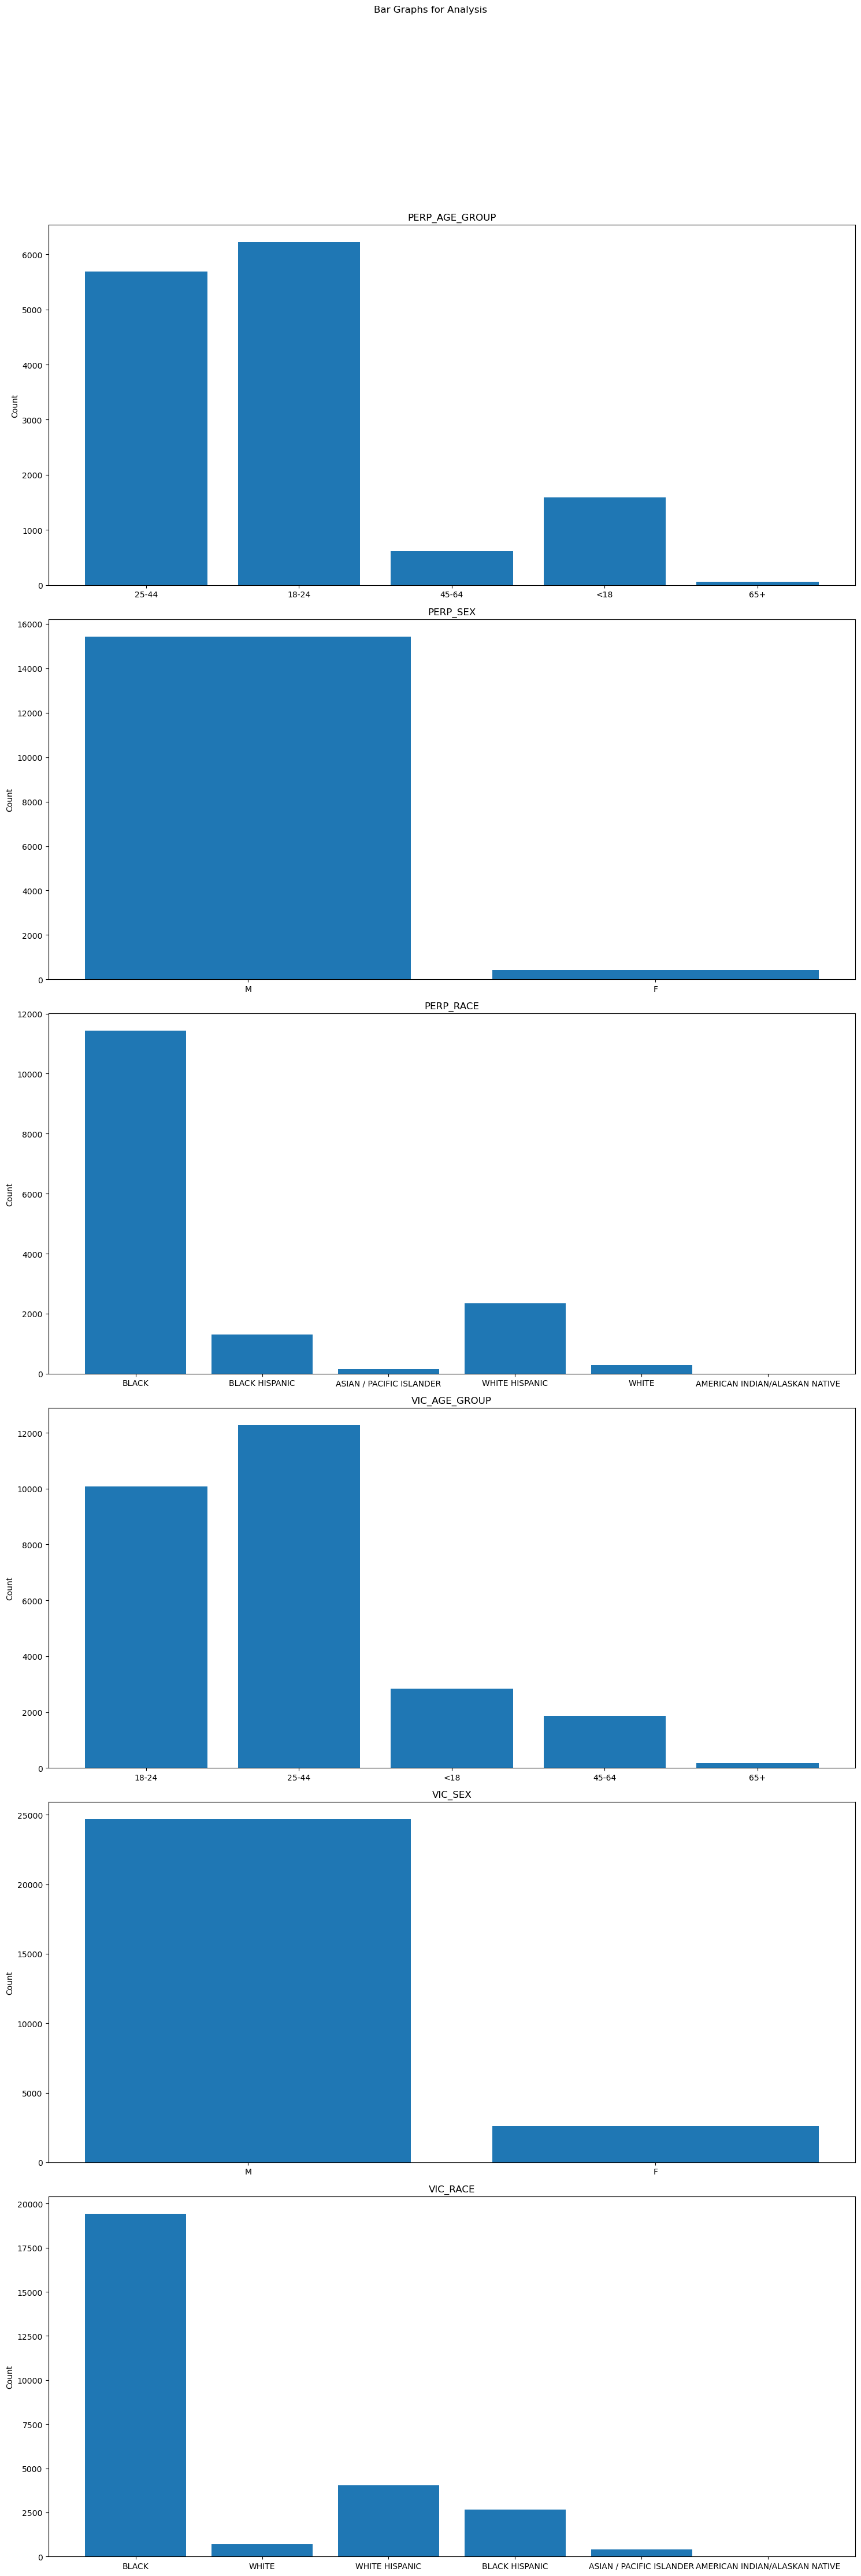

In [109]:
import matplotlib.pyplot as plt

# Handle None values in the specified columns
shooting_data['PERP_AGE_GROUP'] = shooting_data['PERP_AGE_GROUP'].astype(str)
shooting_data['PERP_SEX'] = shooting_data['PERP_SEX'].astype(str)
shooting_data['PERP_RACE'] = shooting_data['PERP_RACE'].astype(str)
shooting_data['VIC_AGE_GROUP'] = shooting_data['VIC_AGE_GROUP'].astype(str)
shooting_data['VIC_SEX'] = shooting_data['VIC_SEX'].astype(str)
shooting_data['VIC_RACE'] = shooting_data['VIC_RACE'].astype(str)

# Distinct values for specified columns
perp_age_group_values = shooting_data['PERP_AGE_GROUP'].unique()
perp_sex_values = shooting_data['PERP_SEX'].unique()
perp_race_values = shooting_data['PERP_RACE'].unique()
vic_age_group_values = shooting_data['VIC_AGE_GROUP'].unique()
vic_sex_values = shooting_data['VIC_SEX'].unique()
vic_race_values = shooting_data['VIC_RACE'].unique()

# Removing None Values
perp_age_group_values = perp_age_group_values[perp_age_group_values != 'None']
perp_sex_values = perp_sex_values[perp_sex_values != 'None']
perp_race_values = perp_race_values[perp_race_values != 'None']
vic_age_group_values = vic_age_group_values[vic_age_group_values != 'None']
vic_sex_values = vic_sex_values[vic_sex_values != 'None']
vic_race_values = vic_race_values[vic_race_values != 'None']

# Remove specific values from perp_age_group_values
values_to_remove = ['940', '224', '1020']
perp_age_group_values = perp_age_group_values[~np.isin(perp_age_group_values, values_to_remove)]

# Remove specific value from vic_age_group_values
value_to_remove_vic = '1022'
vic_age_group_values = vic_age_group_values[vic_age_group_values != value_to_remove_vic]

# Plotting bar graphs
fig, axes = plt.subplots(6, 1, figsize=(15, 45))
fig.suptitle('Bar Graphs for Analysis', y=1.02)

# Plot for PERP_AGE_GROUP
axes[0].bar(perp_age_group_values, shooting_data['PERP_AGE_GROUP'].value_counts().loc[perp_age_group_values])
axes[0].set_title('PERP_AGE_GROUP')
axes[0].set_ylabel('Count')

# Plot for PERP_SEX
axes[1].bar(perp_sex_values, shooting_data['PERP_SEX'].value_counts().loc[perp_sex_values])
axes[1].set_title('PERP_SEX')
axes[1].set_ylabel('Count')

# Plot for PERP_RACE
axes[2].bar(perp_race_values, shooting_data['PERP_RACE'].value_counts().loc[perp_race_values])
axes[2].set_title('PERP_RACE')
axes[2].set_ylabel('Count')

# Plot for VIC_AGE_GROUP
axes[3].bar(vic_age_group_values, shooting_data['VIC_AGE_GROUP'].value_counts().loc[vic_age_group_values])
axes[3].set_title('VIC_AGE_GROUP')
axes[3].set_ylabel('Count')

# Plot for VIC_SEX
axes[4].bar(vic_sex_values, shooting_data['VIC_SEX'].value_counts().loc[vic_sex_values])
axes[4].set_title('VIC_SEX')
axes[4].set_ylabel('Count')

# Plot for VIC_RACE
axes[5].bar(vic_race_values, shooting_data['VIC_RACE'].value_counts().loc[vic_race_values])
axes[5].set_title('VIC_RACE')
axes[5].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


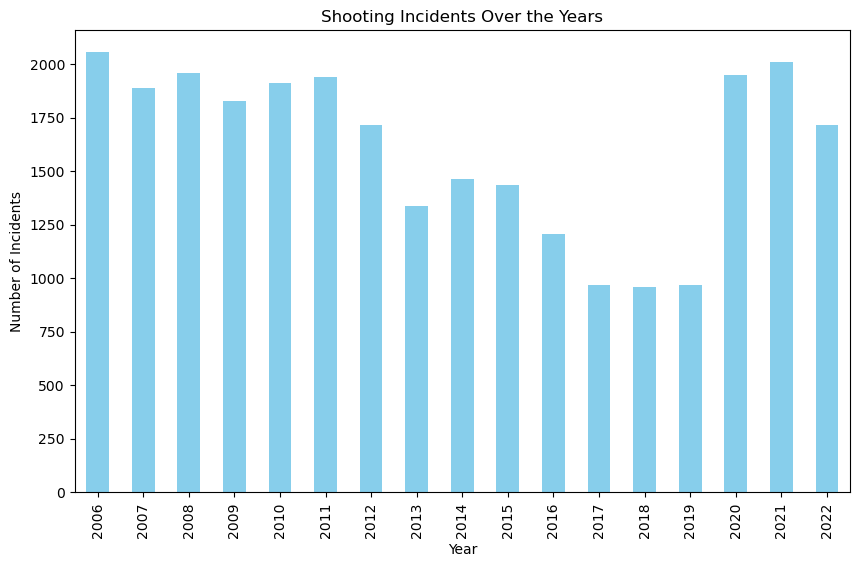

In [86]:
shooting_data['OCCUR_DATE'] = pd.to_datetime(shooting_data['OCCUR_DATE'])

# Extract year from 'OCCUR_DATE'
shooting_data['Year'] = shooting_data['OCCUR_DATE'].dt.year

# Plotting the graph
plt.figure(figsize=(10, 6))
shooting_data['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Shooting Incidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

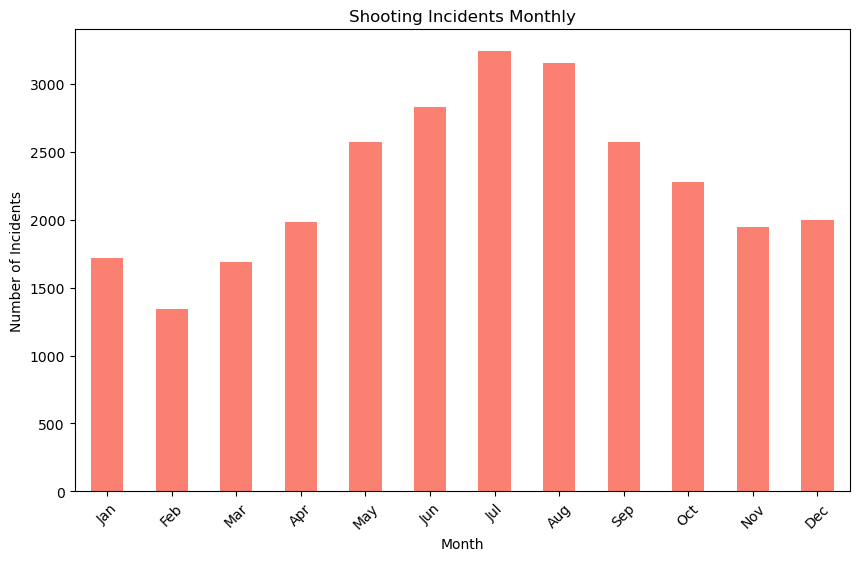

In [87]:

# Convert 'OCCUR_DATE' to datetime
shooting_data['OCCUR_DATE'] = pd.to_datetime(shooting_data['OCCUR_DATE'])

# Extract month from 'OCCUR_DATE'
shooting_data['Month'] = shooting_data['OCCUR_DATE'].dt.month

# Define month names for labeling
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the graph
plt.figure(figsize=(10, 6))
shooting_data['Month'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Shooting Incidents Monthly')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 12), month_names, rotation=45)
plt.show()



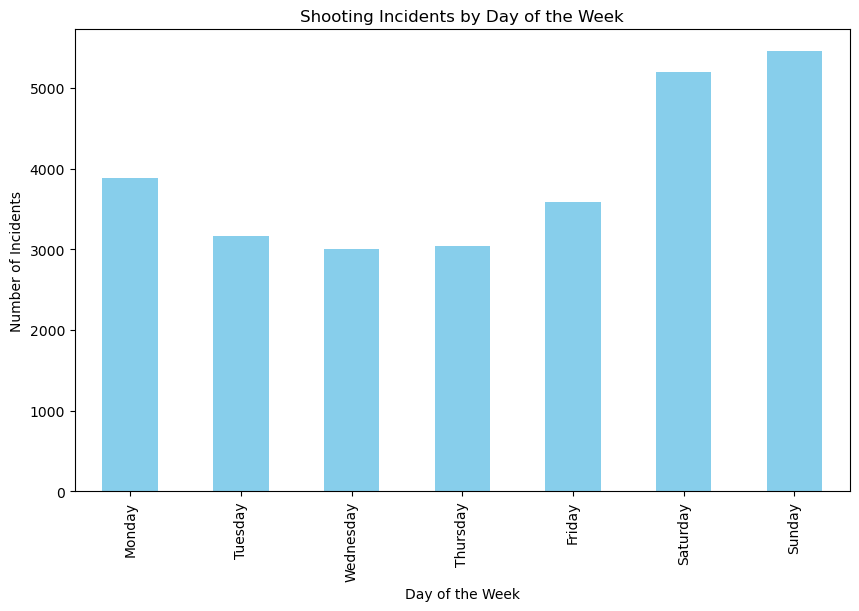

In [88]:

# Convert 'OCCUR_DATE' to datetime
shooting_data['OCCUR_DATE'] = pd.to_datetime(shooting_data['OCCUR_DATE'])

# Extract day of the week from 'OCCUR_DATE'
shooting_data['Day_of_Week'] = shooting_data['OCCUR_DATE'].dt.day_name()

# Plotting the graph
plt.figure(figsize=(10, 6))
shooting_data['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='skyblue')
plt.title('Shooting Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()


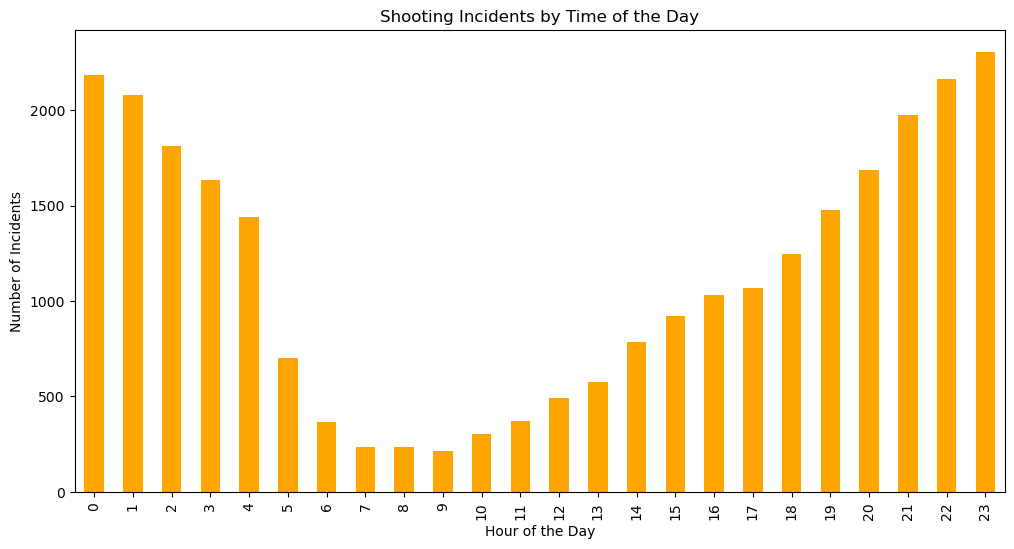

In [89]:
# Convert 'OCCUR_TIME' to datetime
shooting_data['OCCUR_TIME'] = pd.to_datetime(shooting_data['OCCUR_TIME'], format='%H:%M:%S', errors='coerce')

# Extract hour of the day from 'OCCUR_TIME'
shooting_data['Hour_of_Day'] = shooting_data['OCCUR_TIME'].apply(lambda x: x.hour)



# Plotting the graph
plt.figure(figsize=(12, 6))
shooting_data['Hour_of_Day'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Shooting Incidents by Time of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.show()


/var/folders/wt/_pw2b7191fd_mks62z_kdz200000gn/T/ipykernel_24239/124255246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_data_1719['Month'] = shooting_data_1719['OCCUR_DATE'].dt.month


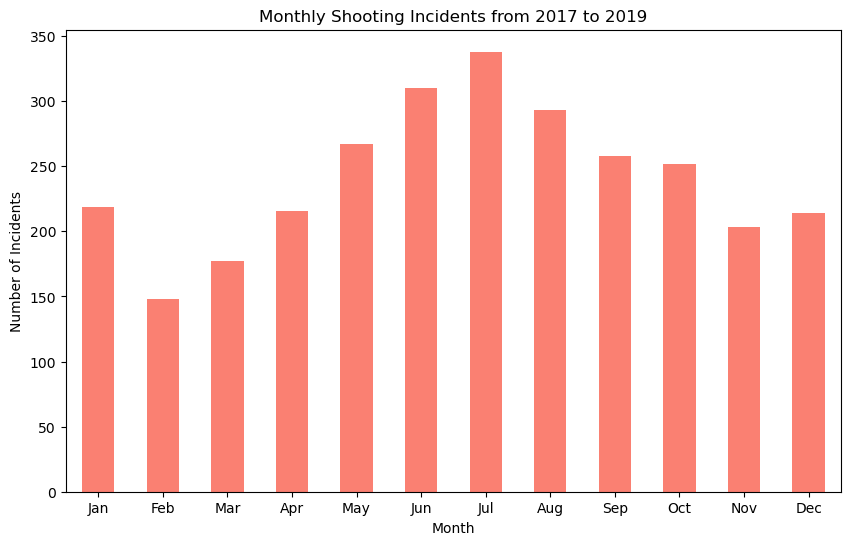

In [90]:
# Filter data for the year 2020
shooting_data_1719 = shooting_data[(shooting_data['OCCUR_DATE'] >= '2017-01-01') & (shooting_data['OCCUR_DATE'] < '2020-01-01')]

# Extract month from 'OCCUR_DATE'
shooting_data_1719['Month'] = shooting_data_1719['OCCUR_DATE'].dt.month

# Plotting the graph
monthly_counts_1719 = shooting_data_1719['Month'].value_counts().sort_index()
monthly_counts_1719.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Monthly Shooting Incidents from 2017 to 2019')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 12), month_names, rotation=0)
plt.show()

/var/folders/wt/_pw2b7191fd_mks62z_kdz200000gn/T/ipykernel_24239/2389788224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_data_20to22['Month'] = shooting_data_20to22['OCCUR_DATE'].dt.month


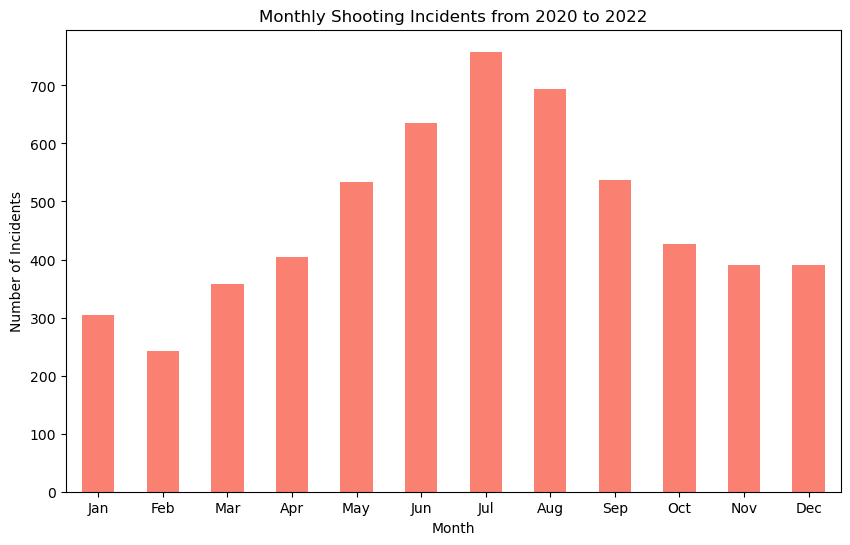

In [91]:
# Filter data for the year 2020
shooting_data_20to22 = shooting_data[(shooting_data['OCCUR_DATE'] >= '2020-01-01')]

# Extract month from 'OCCUR_DATE'
shooting_data_20to22['Month'] = shooting_data_20to22['OCCUR_DATE'].dt.month

# Plotting the graph
monthly_counts_20to22 = shooting_data_20to22['Month'].value_counts().sort_index()
monthly_counts_20to22.plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Monthly Shooting Incidents from 2020 to 2022')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 12), month_names, rotation=0)
plt.show()

which age group/race died
which race is targeting which race
